['shoulder_AP_R', 'shoulder_AP_L', 'shoulder_ML_R', 'shoulder_ML_L', 'hip_AP_R', 'hip_AP_L', 'hip_ML_R', 'hip_ML_L', 'knee_AP_R', 'knee_AP_L', 'ankle_AP_R', 'ankle_AP_L', 'ankle_ML_R', 'ankle_ML_L']
[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [14] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


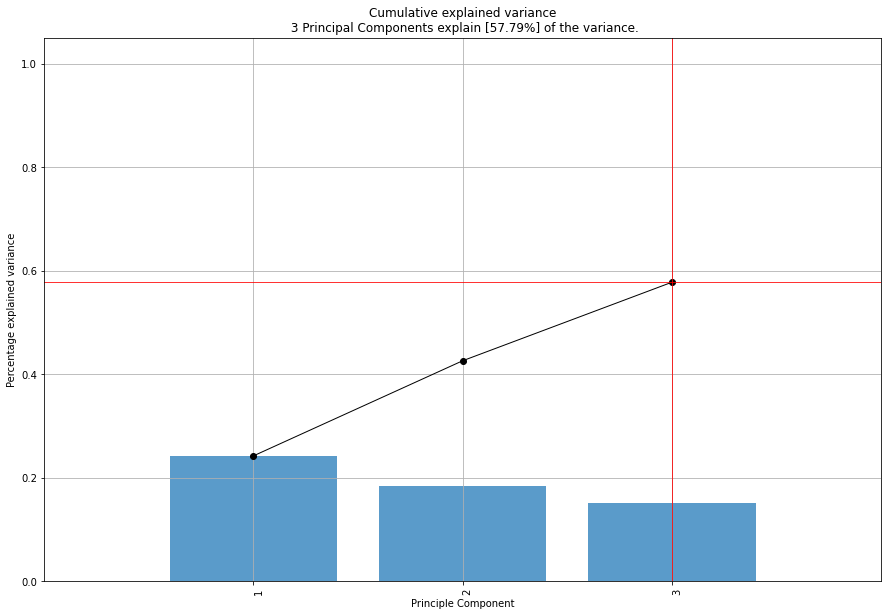

<Figure size 432x288 with 0 Axes>

In [1]:
# from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from pca import pca
import pandas as pd
import numpy as np
    
df = pd.read_csv('C:/Users/user/balanceEstimation/data/phase7_wbb_joints_angle/keypoints/angle_feature/data_wbb_outlier/sametime/dataset_time.csv')
X = df.drop('label', axis =1)
X =X.drop('wbb', axis =1)
col_labels = X.columns.values.tolist()
print(col_labels)
X = X.to_numpy()
y = df['label'].to_numpy()
model = pca(normalize = True, n_components = 3)
results = model.fit_transform(X)
fig, ax = model.plot()


[pca] >Cleaning previous fitted model results..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [14] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.


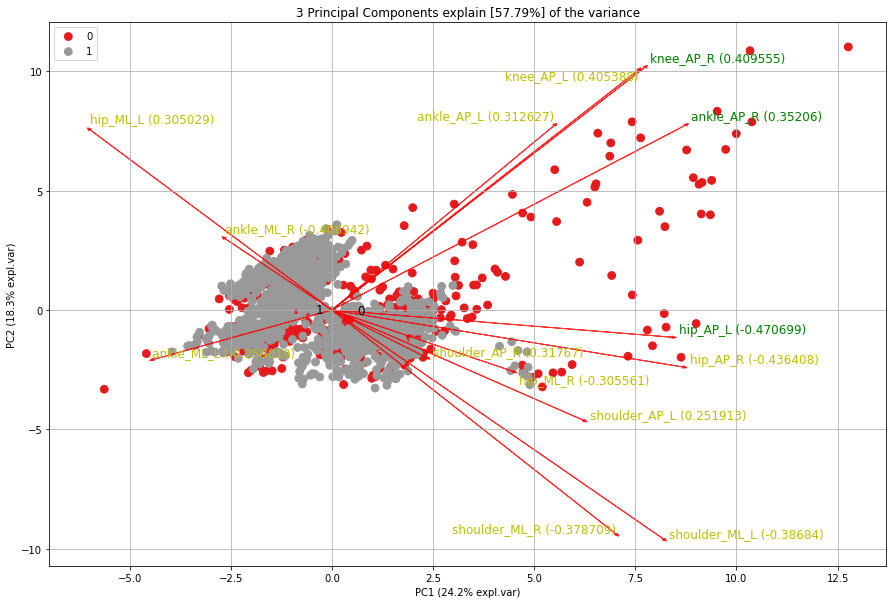

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'3 Principal Components explain [57.79%] of the variance'}, xlabel='PC1 (24.2% expl.var)', ylabel='PC2 (18.3% expl.var)'>)

In [2]:
results= model.fit_transform(X, col_labels = col_labels, row_labels = y)
model.biplot()

C:\Users\user\Anaconda3\lib\site-packages\pca\pca.py:1132: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


(<Figure size 1080x720 with 2 Axes>,
 <Axes3D:title={'center':'cosf'}, xlabel='PC1 (24.2% expl.var)', ylabel='PC2 (18.3% expl.var)'>)

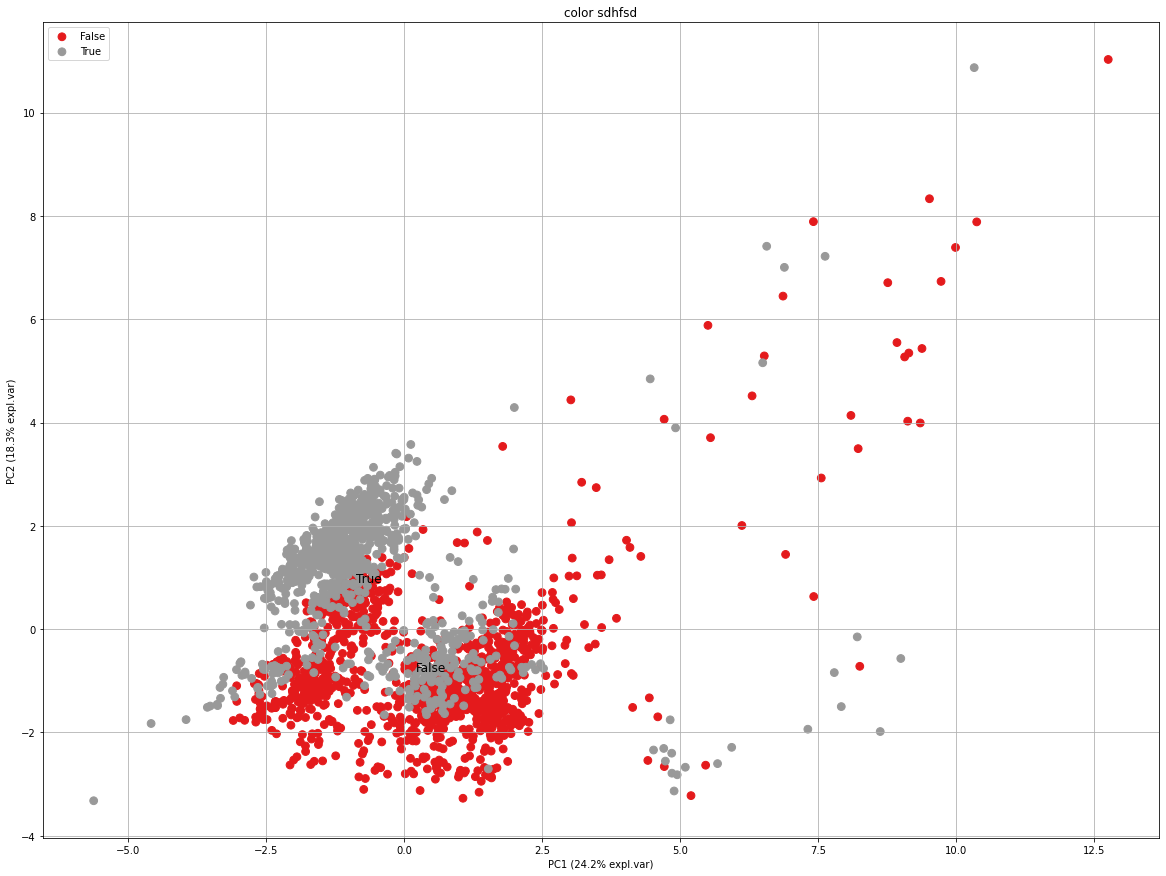

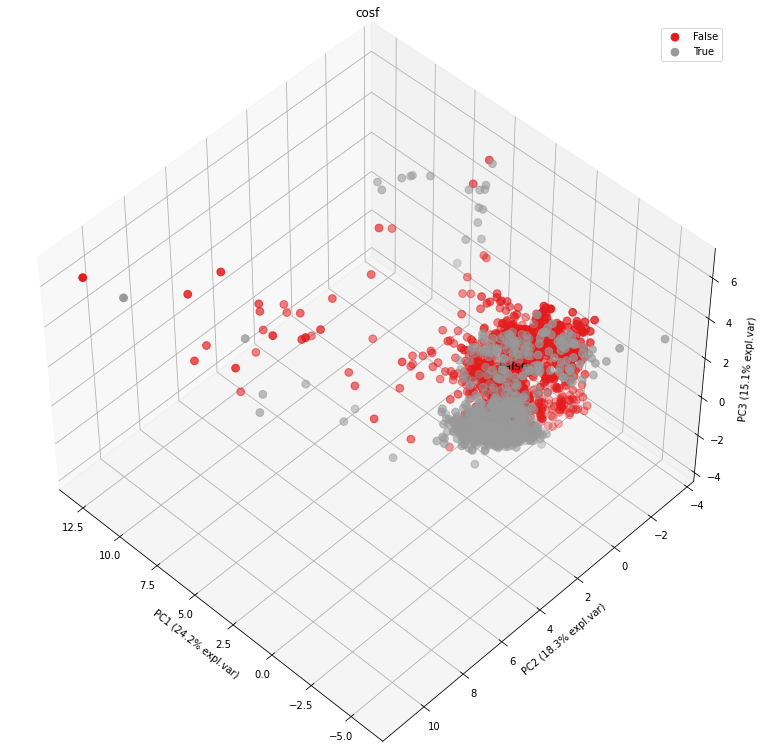

In [3]:
X_feat = X[:, np.array(col_labels) == 'hip_ML_L']
color_label = (X_feat>=np.mean(X_feat)).flatten()
model.scatter(y=color_label, title = 'color sdhfsd')
model.scatter3d(y=color_label, title = "cosf")

In [4]:
print(model.results['topfeat'])

     PC        feature   loading  type
0   PC1     ankle_AP_R  0.352060  best
1   PC2      knee_AP_R  0.409555  best
2   PC3       hip_AP_L -0.470699  best
3   PC3  shoulder_AP_R  0.317670  weak
4   PC1  shoulder_AP_L  0.251913  weak
5   PC2  shoulder_ML_R -0.378709  weak
6   PC2  shoulder_ML_L -0.386840  weak
7   PC3       hip_AP_R -0.436408  weak
8   PC3       hip_ML_R -0.305561  weak
9   PC2       hip_ML_L  0.305029  weak
10  PC2      knee_AP_L  0.405388  weak
11  PC2     ankle_AP_L  0.312627  weak
12  PC3     ankle_ML_R -0.406942  weak
13  PC3     ankle_ML_L -0.259019  weak


In [5]:
#detect ouliers
df = pd.read_csv('C:/Users/user/balanceEstimation/data/phase7_wbb_joints_angle/keypoints/angle_feature/data_wbb_outlier/sametime/dataset_time.csv')
df1 =df.drop('label', axis =1)
df1 = df1.drop('wbb', axis =1)
X = pd.DataFrame(data = df1.values, columns = df1.columns, index = df.label)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [14] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
     y_proba   y_score  y_bool  y_bool_spe  y_score_spe
1   0.942466  1.734003   False       False     1.082689
0   0.661026  4.115673   False       False     1.532526
0   0.825037  2.869512   False       False     1.239916
1   0.849663  2.664153   False       False     0.752570
1   0.750905  3.447771   False       False     1.174195
..       ...       ...     ...         ...          ...
1   0.441953  5.834761   False       False     2.189472
1   0.363151  6.563042   False       False     2.558311
1   0.362608  6.568412   False       False     2.594368
1   0.412047  6.1003

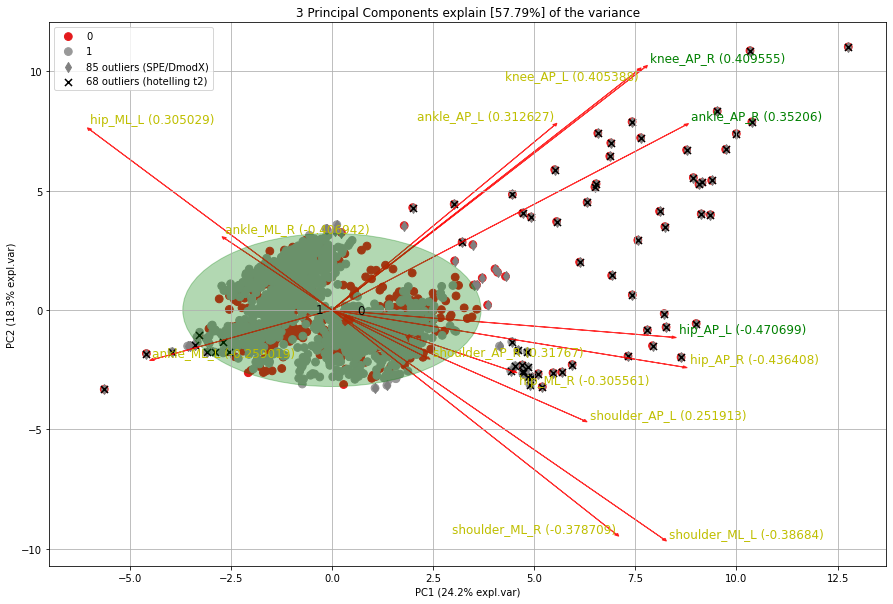

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'3 Principal Components explain [57.79%] of the variance'}, xlabel='PC1 (24.2% expl.var)', ylabel='PC2 (18.3% expl.var)'>)

In [7]:
model = pca(n_components =3, normalize = True)
out =model.fit_transform(X)
print(out['outliers'])
model.biplot(legend = True, SPE = True, hotellingt2 = True)

C:\Users\user\Anaconda3\lib\site-packages\pca\pca.py:1132: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


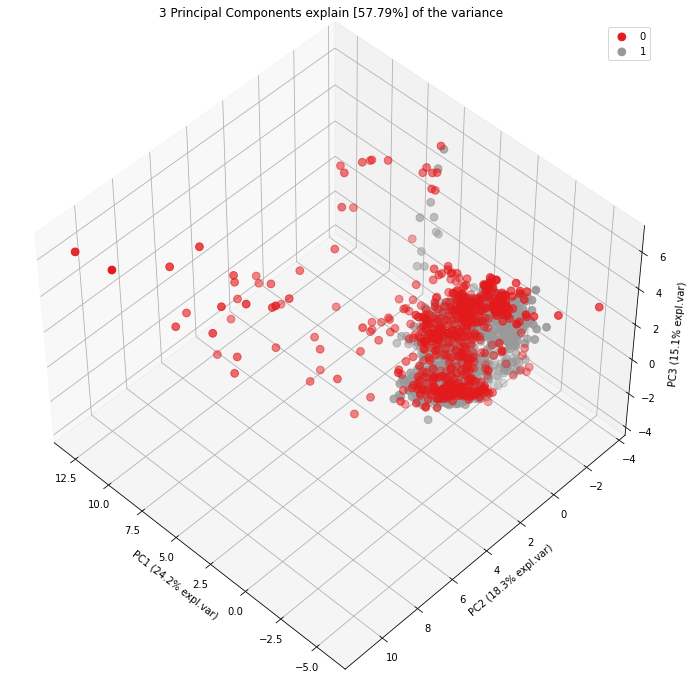

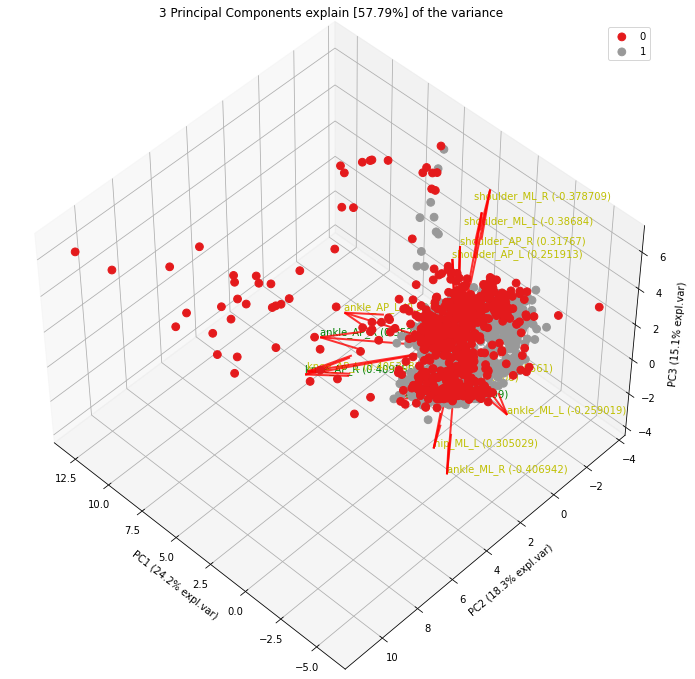

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


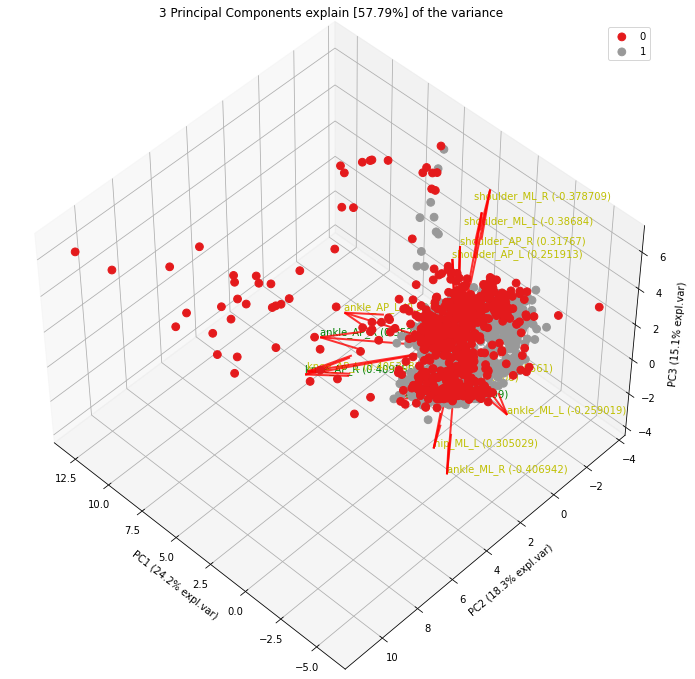

In [8]:
#3D plot
fig,ax = model.scatter3d(figsize = (15,9))
fig,ax = model.biplot3d(figsize = (15,9))
fig,ax = model.biplot3d(SPE = False, hotellingt2 = False, figsize = (15,9))

In [15]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn  as sns
from matplotlib import pyplot as plt

df = df = pd.read_csv('C:/Users/user/balanceEstimation/data/phase7_wbb_joints_angle/keypoints/angle_feature/data_wbb_outlier/sametime/dataset_time.csv')
df1 =df.drop('label', axis =1)
df1 =df1.drop('wbb', axis =1)
scaler = StandardScaler()
X = scaler.fit_transform(df1)
Y = df.label
y= df['label'].to_numpy()
PCA =  PCA(n_components = 3)
components = PCA.fit_transform(X)
PCA.components_
components
print(type(components))

<class 'numpy.ndarray'>


In [16]:
cumVar =  pd.DataFrame(np.cumsum(PCA.explained_variance_ratio_)*100, columns = ["cumVarPerc"])
expVar = pd.DataFrame(PCA.explained_variance_ratio_*100, columns = ["VarPerc"])
pd.concat([expVar, cumVar], axis =1).rename(index = {0: "PC1", 1: "PC2", 2:"PC3"})
np.transpose(PCA.components_)

array([[ 0.09700664, -0.08252106,  0.31766958],
       [ 0.25191291, -0.18733743,  0.10064844],
       [ 0.28311878, -0.37870891,  0.24078558],
       [ 0.3302238 , -0.38683996,  0.11263316],
       [ 0.35074379, -0.09657011, -0.43640838],
       [ 0.34001344, -0.04612624, -0.47069931],
       [ 0.18275325, -0.10504036, -0.30556109],
       [-0.24136116,  0.30502917, -0.05560063],
       [ 0.31149544,  0.40955454,  0.01942487],
       [ 0.3052722 ,  0.4053882 ,  0.0328292 ],
       [ 0.35205981,  0.31215274,  0.08192952],
       [ 0.22205012,  0.31262716,  0.26260767],
       [-0.10848264,  0.12287829, -0.40694166],
       [-0.17999979, -0.08456372, -0.2590194 ]])

In [17]:
#pc2, pc3
def biplot(score, coeff, labels):
    xs = score[:,1]
    ys = score[:,2]
    n = coeff.shape[0]
    print(n)
    print(coeff)
#     scalex = 1.0/(xs.max() - xs.min())
#     scaley = 1.0/(ys.max() - ys.min())
    scatter = plt.scatter(xs, ys, c = y, s=60)
    plt.legend(*scatter.legend_elements(), prop={'size':14})
    #plt.legend(["0", "1"])
    #sns.scatterplot(data = pcaDf, x = "PC1", y = "PC2", hue = "label")
    for i in range(n):
        plt.arrow(0,0, coeff[i,1]*10, coeff[i,2]*10, color = 'r',width = 0.07, alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,1]*12, coeff[i,2]*12, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,1]*12, coeff[i,2]*12, labels[i], color = 'g', ha ='center', va = 'center', fontsize =16, weight = 2)
    plt.xlabel("PC{}".format(2),fontsize =16)
    plt.ylabel("PC{}".format(3),fontsize =16)
    plt.xlim([-6,15])
    plt.ylim([-6,6])
    plt.yticks(fontsize =15)
    plt.xticks(fontsize =15)
    plt.grid()

14
[[ 0.09700664 -0.08252106  0.31766958]
 [ 0.25191291 -0.18733743  0.10064844]
 [ 0.28311878 -0.37870891  0.24078558]
 [ 0.3302238  -0.38683996  0.11263316]
 [ 0.35074379 -0.09657011 -0.43640838]
 [ 0.34001344 -0.04612624 -0.47069931]
 [ 0.18275325 -0.10504036 -0.30556109]
 [-0.24136116  0.30502917 -0.05560063]
 [ 0.31149544  0.40955454  0.01942487]
 [ 0.3052722   0.4053882   0.0328292 ]
 [ 0.35205981  0.31215274  0.08192952]
 [ 0.22205012  0.31262716  0.26260767]
 [-0.10848264  0.12287829 -0.40694166]
 [-0.17999979 -0.08456372 -0.2590194 ]]


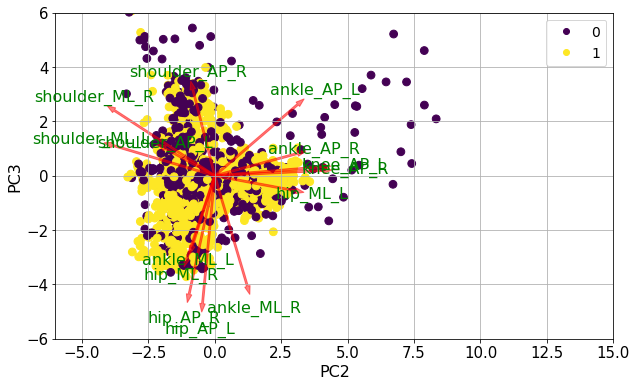

In [18]:
plt.figure(figsize=(10,6))
biplot(components,np.transpose(PCA.components_), list(df1.columns))

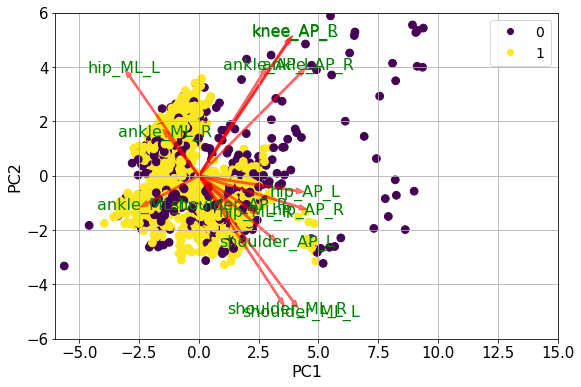

In [30]:
#pc1 ,pc2
def biplot(score, coeff, labels):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
#     scalex = 1.0/(xs.max() - xs.min())
#     scaley = 1.0/(ys.max() - ys.min())
    scatter = plt.scatter(xs, ys, c = y, s=60)
    plt.legend(*scatter.legend_elements(), prop={'size':14})
    #plt.legend(["0", "1"])
    #sns.scatterplot(data = pcaDf, x = "PC1", y = "PC2", hue = "label")
    for i in range(n):
        plt.arrow(0,0, coeff[i,0]*12, coeff[i,1]*12, color = 'r', alpha = 0.5,width = 0.07)
        if labels is None:
            plt.text(coeff[i,0]*13, coeff[i,1]*13, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]*13, coeff[i,1]*13, labels[i], color = 'g', ha ='center', va = 'center', fontsize =16, weight = 2)
    plt.xlabel("PC{}".format(1), fontsize =16)
    plt.ylabel("PC{}".format(2), fontsize = 16)
    plt.xlim([-6,15])
    plt.ylim([-6,6])
    plt.yticks(fontsize =15)
    plt.xticks(fontsize =15)
    plt.grid()
plt.figure(figsize=(9,6))
biplot(components,np.transpose(PCA.components_), list(df1.columns))

14
[[ 0.09700664 -0.08252106  0.31766958]
 [ 0.25191291 -0.18733743  0.10064844]
 [ 0.28311878 -0.37870891  0.24078558]
 [ 0.3302238  -0.38683996  0.11263316]
 [ 0.35074379 -0.09657011 -0.43640838]
 [ 0.34001344 -0.04612624 -0.47069931]
 [ 0.18275325 -0.10504036 -0.30556109]
 [-0.24136116  0.30502917 -0.05560063]
 [ 0.31149544  0.40955454  0.01942487]
 [ 0.3052722   0.4053882   0.0328292 ]
 [ 0.35205981  0.31215274  0.08192952]
 [ 0.22205012  0.31262716  0.26260767]
 [-0.10848264  0.12287829 -0.40694166]
 [-0.17999979 -0.08456372 -0.2590194 ]]


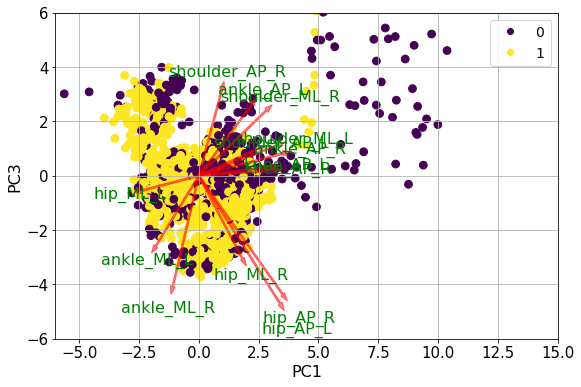

In [20]:
#pc1,pc3
def biplot(score, coeff, labels):
    xs = score[:,0]
    ys = score[:,2]
    n = coeff.shape[0]
    print(n)
    print(coeff)
#     scalex = 1.0/(xs.max() - xs.min())
#     scaley = 1.0/(ys.max() - ys.min())
    scatter = plt.scatter(xs, ys, c = y, s=60)
    plt.legend(*scatter.legend_elements(),prop={'size':14})
    #plt.legend(["0", "1"])
    #sns.scatterplot(data = pcaDf, x = "PC1", y = "PC2", hue = "label")
    for i in range(n):
        plt.arrow(0,0, coeff[i,0]*10, coeff[i,2]*10, color = 'r', alpha = 0.5,width = 0.07)
        if labels is None:
            plt.text(coeff[i,0]*12, coeff[i,2]*12, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]*12, coeff[i,2]*12, labels[i], color = 'g', ha ='center', va = 'center',fontsize =16, weight = 2)
    plt.xlabel("PC{}".format(1),fontsize =16)
    plt.ylabel("PC{}".format(3),fontsize =16)
    plt.xlim([-6,15])
    plt.ylim([-6,6])
    plt.yticks(fontsize =15)
    plt.xticks(fontsize =15)
    plt.grid()
plt.figure(figsize=(9,6))
biplot(components,np.transpose(PCA.components_), list(df1.columns))

In [ ]:
#plot with border boundery
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn  as sns

df = df = pd.read_csv('C:/Users/user/balanceEstimation/data/phase7_wbb_joints_angle/keypoints/angle_feature/data_wbb_outlier/sametime/mrkim2_angle_time.csv')
df1 =df.drop('label', axis =1)
df1 =df1.drop('wbb', axis =1)
scaler = StandardScaler()
X = scaler.fit_transform(df1)
Y = df.label
y= df['label'].to_numpy()
PCA =  PCA(n_components = 3)
components = PCA.fit_transform(X)
PCA.components_
components
print(type(components))

In [26]:
from scipy.spatial import ConvexHull

def encircle(x,y, ax= None, **kw):
    if not ax:ax = plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

In [21]:
cumVar =  pd.DataFrame(np.cumsum(PCA.explained_variance_ratio_)*100, columns = ["cumVarPerc"])
expVar = pd.DataFrame(PCA.explained_variance_ratio_*100, columns = ["VarPerc"])
pd.concat([expVar, cumVar], axis =1).rename(index = {0: "PC1", 1: "PC2", 2:"PC3"})

,VarPerc,cumVarPerc
PC1,24.252392,24.252392
PC2,18.374798,42.627190
PC3,15.166227,57.793417


In [22]:
y=Y

<Figure size 648x432 with 0 Axes>

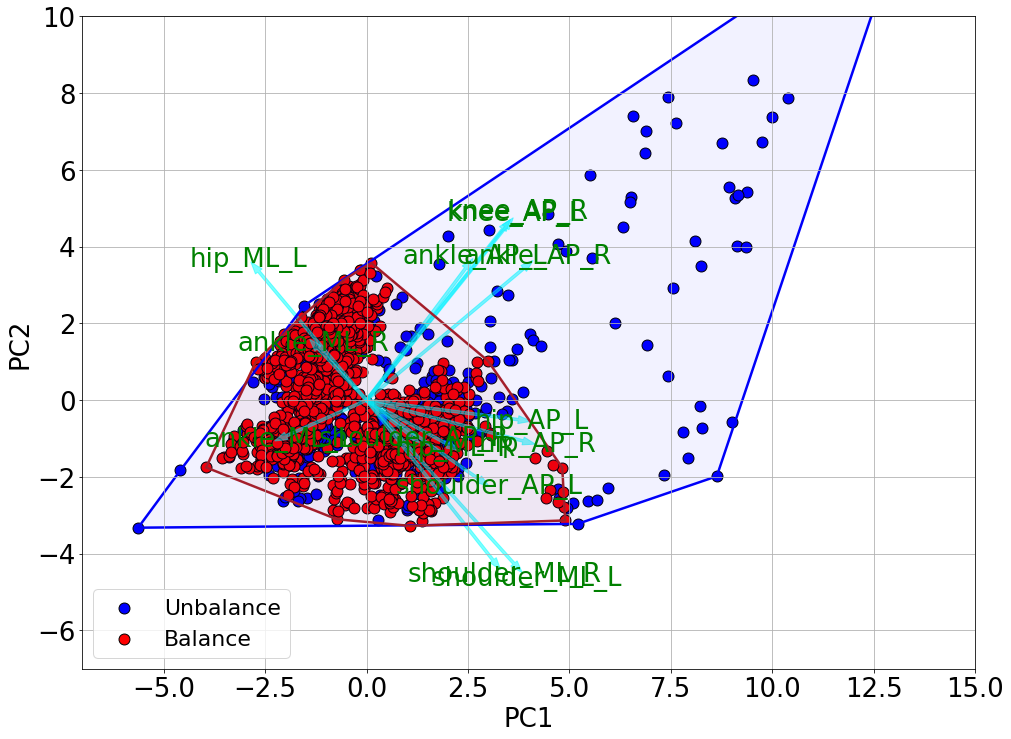

In [27]:
#pc1 ,pc2
def biplot(score, coeff, labels, Y):
    fig,ax = plt.subplots(1,1,figsize = (16,12))
    df_pca = pd.DataFrame(score)
    rows_0 = Y ==0
    rows_1 = Y ==1
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
#     scalex = 1.0/(xs.max() - xs.min())
#     scaley = 1.0/(ys.max() - ys.min())
#     scatter = plt.scatter(xs, ys, c = y, s=60)
    
#     plt.legend(*scatter.legend_elements(), prop={'size':14})
    ax.scatter(df_pca.loc[rows_0.tolist(), 0], df_pca.loc[rows_0.tolist(),1], c= 'blue', edgecolor = 'k', s =120, label = 'Unbalance')
    ax.scatter(df_pca.loc[rows_1.tolist(), 0], df_pca.loc[rows_1.tolist(),1], c= 'red', edgecolor = 'k', s =120, label = 'Balance')
    #plt.legend(["0", "1"])
    #sns.scatterplot(data = pcaDf, x = "PC1", y = "PC2", hue = "label")
    for i in range(n):
        plt.arrow(0,0, coeff[i,0]*11, coeff[i,1]*11, color = 'cyan', alpha = 0.5,width = 0.07)
        if labels is None:
            plt.text(coeff[i,0]*13, coeff[i,1]*13, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]*12, coeff[i,1]*12, labels[i], color = 'g', ha ='center', va = 'center', fontsize =26, weight = 2)
    encircle(df_pca.loc[rows_0.tolist(), 0], df_pca.loc[rows_0.tolist(),1], ec = "blue", fc = "none", linewidth = 2.5)
    encircle(df_pca.loc[rows_1.tolist(), 0], df_pca.loc[rows_1.tolist(),1], ec = "firebrick", fc = "none", linewidth = 2.5)
#encircle(df_pca.loc[rows_2.tolist(), 1], df_pca.loc[rows_2.tolist(),2], ec = "green", fc = "none", linewidth = 2.5)

    encircle(df_pca.loc[rows_1.tolist(), 0], df_pca.loc[rows_1.tolist(),1], ec = "k", fc = "firebrick", alpha = 0.05)
    encircle(df_pca.loc[rows_0.tolist(), 0], df_pca.loc[rows_0.tolist(),1], ec = "k", fc = "blue", alpha = 0.05)
    ax.legend(loc ='best',fontsize =22)
    plt.xlabel("PC{}".format(1), fontsize =26)
    plt.ylabel("PC{}".format(2), fontsize = 26)
    plt.xlim([-7,15])
    plt.ylim([-7,10])
    plt.yticks(fontsize =26)
    plt.xticks(fontsize =26)
    plt.grid()
    
plt.figure(figsize=(9,6))
biplot(components,np.transpose(PCA.components_), list(df1.columns), y)

14
[[ 0.09700664 -0.08252106  0.31766958]
 [ 0.25191291 -0.18733743  0.10064844]
 [ 0.28311878 -0.37870891  0.24078558]
 [ 0.3302238  -0.38683996  0.11263316]
 [ 0.35074379 -0.09657011 -0.43640838]
 [ 0.34001344 -0.04612624 -0.47069931]
 [ 0.18275325 -0.10504036 -0.30556109]
 [-0.24136116  0.30502917 -0.05560063]
 [ 0.31149544  0.40955454  0.01942487]
 [ 0.3052722   0.4053882   0.0328292 ]
 [ 0.35205981  0.31215274  0.08192952]
 [ 0.22205012  0.31262716  0.26260767]
 [-0.10848264  0.12287829 -0.40694166]
 [-0.17999979 -0.08456372 -0.2590194 ]]


<Figure size 648x432 with 0 Axes>

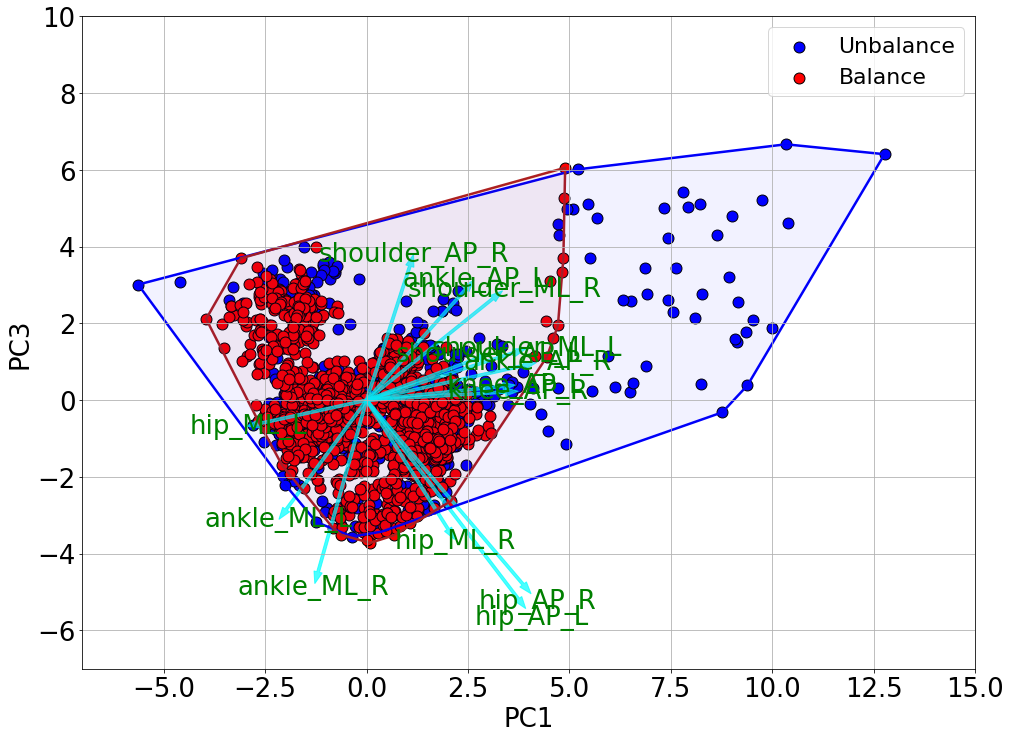

In [28]:
#pc1,pc3
def biplot(score, coeff, labels,Y):
    fig,ax = plt.subplots(1,1,figsize = (16,12))
    df_pca = pd.DataFrame(score)
    rows_0 = Y ==0
    rows_2 = Y ==1
    xs = score[:,0]
    ys = score[:,2]
    n = coeff.shape[0]
    print(n)
    print(coeff)
    ax.scatter(df_pca.loc[rows_0.tolist(), 0], df_pca.loc[rows_0.tolist(),2], c= 'blue', edgecolor = 'k', s =120, label = 'Unbalance')
    ax.scatter(df_pca.loc[rows_2.tolist(), 0], df_pca.loc[rows_2.tolist(),2], c= 'red', edgecolor = 'k', s =120, label = 'Balance')

#     scalex = 1.0/(xs.max() - xs.min())
#     scaley = 1.0/(ys.max() - ys.min())
#     scatter = plt.scatter(xs, ys, c = y, s=60)
#     plt.legend(*scatter.legend_elements(),prop={'size':14})
    #plt.legend(["0", "1"])
    #sns.scatterplot(data = pcaDf, x = "PC1", y = "PC2", hue = "label")
    for i in range(n):
        plt.arrow(0,0, coeff[i,0]*11, coeff[i,2]*11, color = 'cyan', alpha = 0.7,width = 0.07)
        if labels is None:
            plt.text(coeff[i,0]*12, coeff[i,2]*12, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]*12, coeff[i,2]*12, labels[i], color = 'g', ha ='center', va = 'center',fontsize =26, weight = 2)
    encircle(df_pca.loc[rows_0.tolist(), 0], df_pca.loc[rows_0.tolist(),2], ec = "blue", fc = "none", linewidth = 2.5)
    encircle(df_pca.loc[rows_2.tolist(), 0], df_pca.loc[rows_2.tolist(),2], ec = "firebrick", fc = "none", linewidth = 2.5)
#encircle(df_pca.loc[rows_2.tolist(), 1], df_pca.loc[rows_2.tolist(),2], ec = "green", fc = "none", linewidth = 2.5)

    encircle(df_pca.loc[rows_2.tolist(), 0], df_pca.loc[rows_2.tolist(),2], ec = "k", fc = "firebrick", alpha = 0.05)
    encircle(df_pca.loc[rows_0.tolist(), 0], df_pca.loc[rows_0.tolist(),2], ec = "k", fc = "blue", alpha = 0.05)
    ax.legend(loc ='best', fontsize =22)    
    plt.xlabel("PC{}".format(1),fontsize =26)
    plt.ylabel("PC{}".format(3),fontsize =26)
    plt.xlim([-7,15])
    plt.ylim([-7,10])
    plt.yticks(fontsize =26)
    plt.xticks(fontsize =26)
    plt.grid()
plt.figure(figsize=(9,6))
biplot(components,np.transpose(PCA.components_), list(df1.columns),y)

14
[[ 0.09700664 -0.08252106  0.31766958]
 [ 0.25191291 -0.18733743  0.10064844]
 [ 0.28311878 -0.37870891  0.24078558]
 [ 0.3302238  -0.38683996  0.11263316]
 [ 0.35074379 -0.09657011 -0.43640838]
 [ 0.34001344 -0.04612624 -0.47069931]
 [ 0.18275325 -0.10504036 -0.30556109]
 [-0.24136116  0.30502917 -0.05560063]
 [ 0.31149544  0.40955454  0.01942487]
 [ 0.3052722   0.4053882   0.0328292 ]
 [ 0.35205981  0.31215274  0.08192952]
 [ 0.22205012  0.31262716  0.26260767]
 [-0.10848264  0.12287829 -0.40694166]
 [-0.17999979 -0.08456372 -0.2590194 ]]


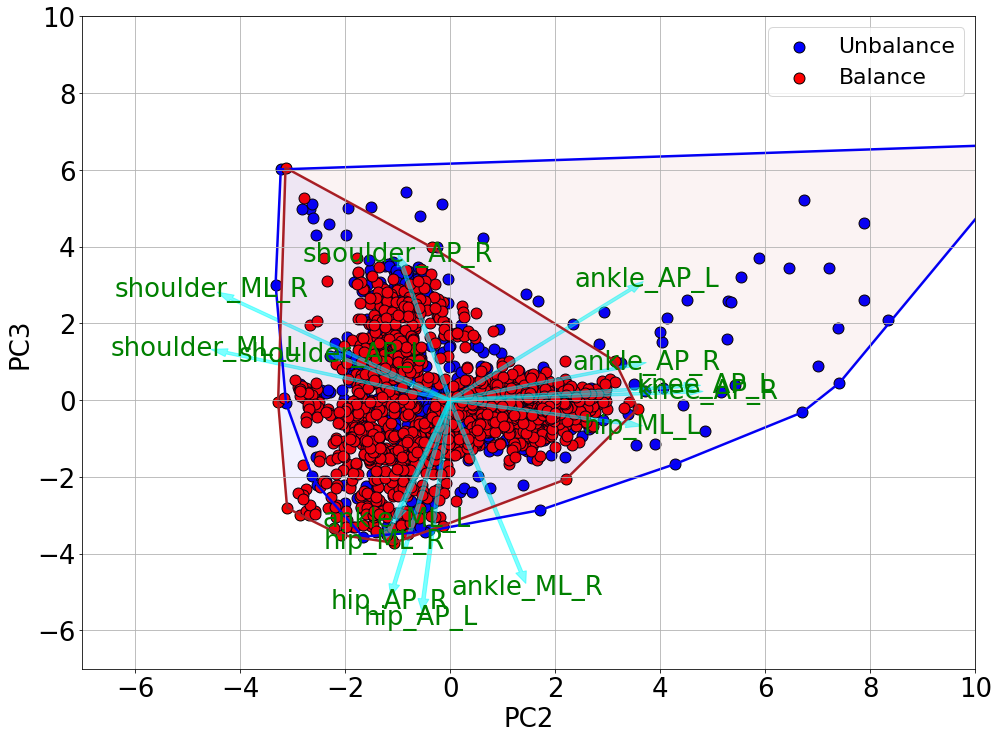

In [29]:
#pc2, pc3
def biplot(score, coeff, labels,Y):
    fig,ax = plt.subplots(1,1,figsize = (16,12))
    df_pca = pd.DataFrame(score)
    rows_1 = Y ==0
    rows_2 = Y ==1
    xs = score[:,1]
    ys = score[:,2]
    n = coeff.shape[0]
    print(n)
    print(coeff)
    ax.scatter(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(),2], c= 'blue', edgecolor = 'k', s =120, label = 'Unbalance')
    ax.scatter(df_pca.loc[rows_2.tolist(), 1], df_pca.loc[rows_2.tolist(),2], c= 'red', edgecolor = 'k', s =120, label = 'Balance')

#     scalex = 1.0/(xs.max() - xs.min())
#     scaley = 1.0/(ys.max() - ys.min())
#     scatter = plt.scatter(xs, ys, c = y, s=60)
#     plt.legend(*scatter.legend_elements(), prop={'size':14})
    #plt.legend(["0", "1"])
    #sns.scatterplot(data = pcaDf, x = "PC1", y = "PC2", hue = "label")
    for i in range(n):
        plt.arrow(0,0, coeff[i,1]*11, coeff[i,2]*11, color = 'cyan',width = 0.07, alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,1]*12, coeff[i,2]*12, "Var"+str(i+1), color = 'yellow', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,1]*12, coeff[i,2]*12, labels[i], color = 'g', ha ='center', va = 'center', fontsize =26, weight = 2)
    encircle(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(),2], ec = "blue", fc = "none", linewidth = 2.5)
    encircle(df_pca.loc[rows_2.tolist(), 1], df_pca.loc[rows_2.tolist(),2], ec = "firebrick", fc = "none", linewidth = 2.5)
#encircle(df_pca.loc[rows_2.tolist(), 1], df_pca.loc[rows_2.tolist(),2], ec = "green", fc = "none", linewidth = 2.5)

    encircle(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(),2], ec = "k", fc = "firebrick", alpha = 0.05)
    encircle(df_pca.loc[rows_2.tolist(), 1], df_pca.loc[rows_2.tolist(),2], ec = "k", fc = "blue", alpha = 0.05)
    ax.legend(loc ='best', fontsize =22)
    plt.xlabel("PC{}".format(2),fontsize =26)
    plt.ylabel("PC{}".format(3),fontsize =26)
    plt.xlim([-7,10])
    plt.ylim([-7,10])
    plt.yticks(fontsize =26)
    plt.xticks(fontsize =26)
    plt.grid()
biplot(components,np.transpose(PCA.components_), list(df1.columns),y)